In [73]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import IPython.display

plt.rcParams["figure.figsize"] = (32,32)

import torch
import torchaudio

torchaudio.set_audio_backend("sox_io")

def plot_sound(data, rate, title=None):
    if data.ndim == 1:
        data = data[np.newaxis]
    times = np.arange(data.shape[1])/rate
    plt.figure(figsize=(30,6))
    for channel in data:
        plt.fill_between(times, channel)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(times[0], times[-1])
    if title:
        plt.title(title)
    plt.show()

def play_sound(data, rate):
    data16 = (128*(data + 1)).to(torch.uint8)
    print(data16.min(), data16.max())
    return IPython.display.Audio(data16.cpu().numpy(), rate=rate)

In [100]:
fname = "../datasets/NSynth/test/audio/flute_synthetic_000-079-025.wav"

audio, rate = torchaudio.load(fname)

In [136]:
nfft = 512
win_length = 512

stft = torchaudio.transforms.Spectrogram(n_fft=nfft, win_length=win_length, normalized=False)
istft = torchaudio.transforms.GriffinLim(n_fft=nfft, win_length=win_length, normalized=False, n_iter=512)

torch.Size([1, 257, 251]) torch.Size([1, 64000]) torch.Size([1, 64000])


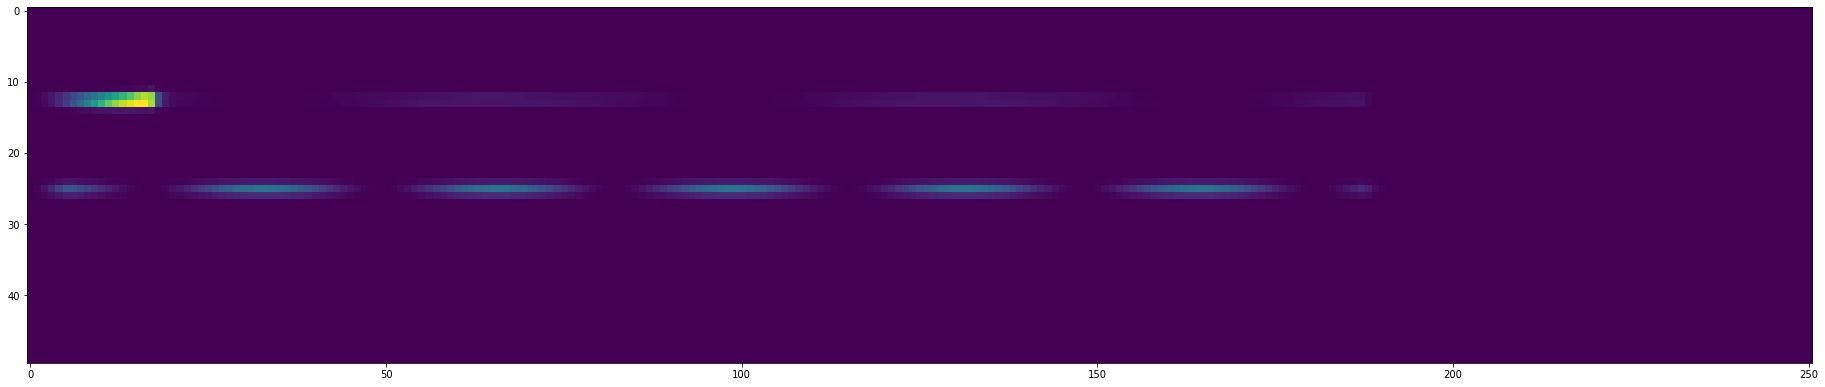

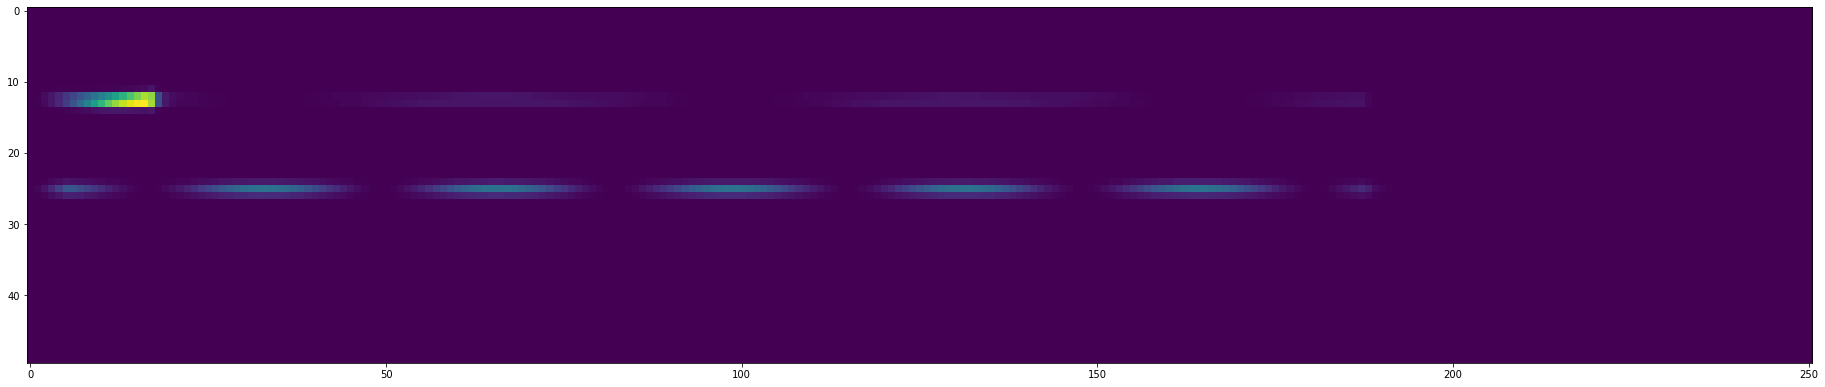

In [137]:
spectro = stft(audio)
reconstruction = istft(spectro)
respectro = stft(reconstruction)

print(spectro.shape, audio.shape, reconstruction.shape)

plt.imshow(spectro.squeeze(0).cpu().numpy()[:50])
plt.show()

plt.imshow(respectro.squeeze(0).cpu().numpy()[:50])
plt.show()

In [138]:
torch.norm(audio - reconstruction)

tensor(49.2983)

In [139]:
torch.norm(spectro - respectro)

tensor(217.9413)

tensor(0.9315)


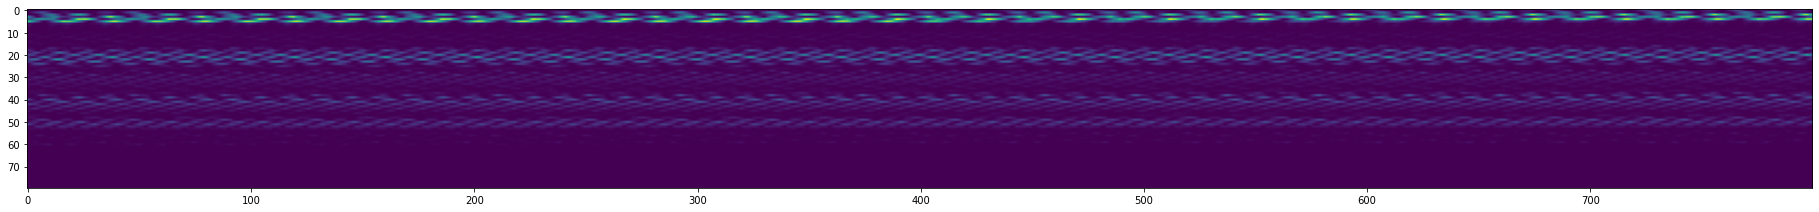

In [140]:
tdiff = (audio - reconstruction).view(80,800)**2

print(tdiff.max())
plt.imshow(tdiff.cpu().numpy())

tensor(1785.3101)


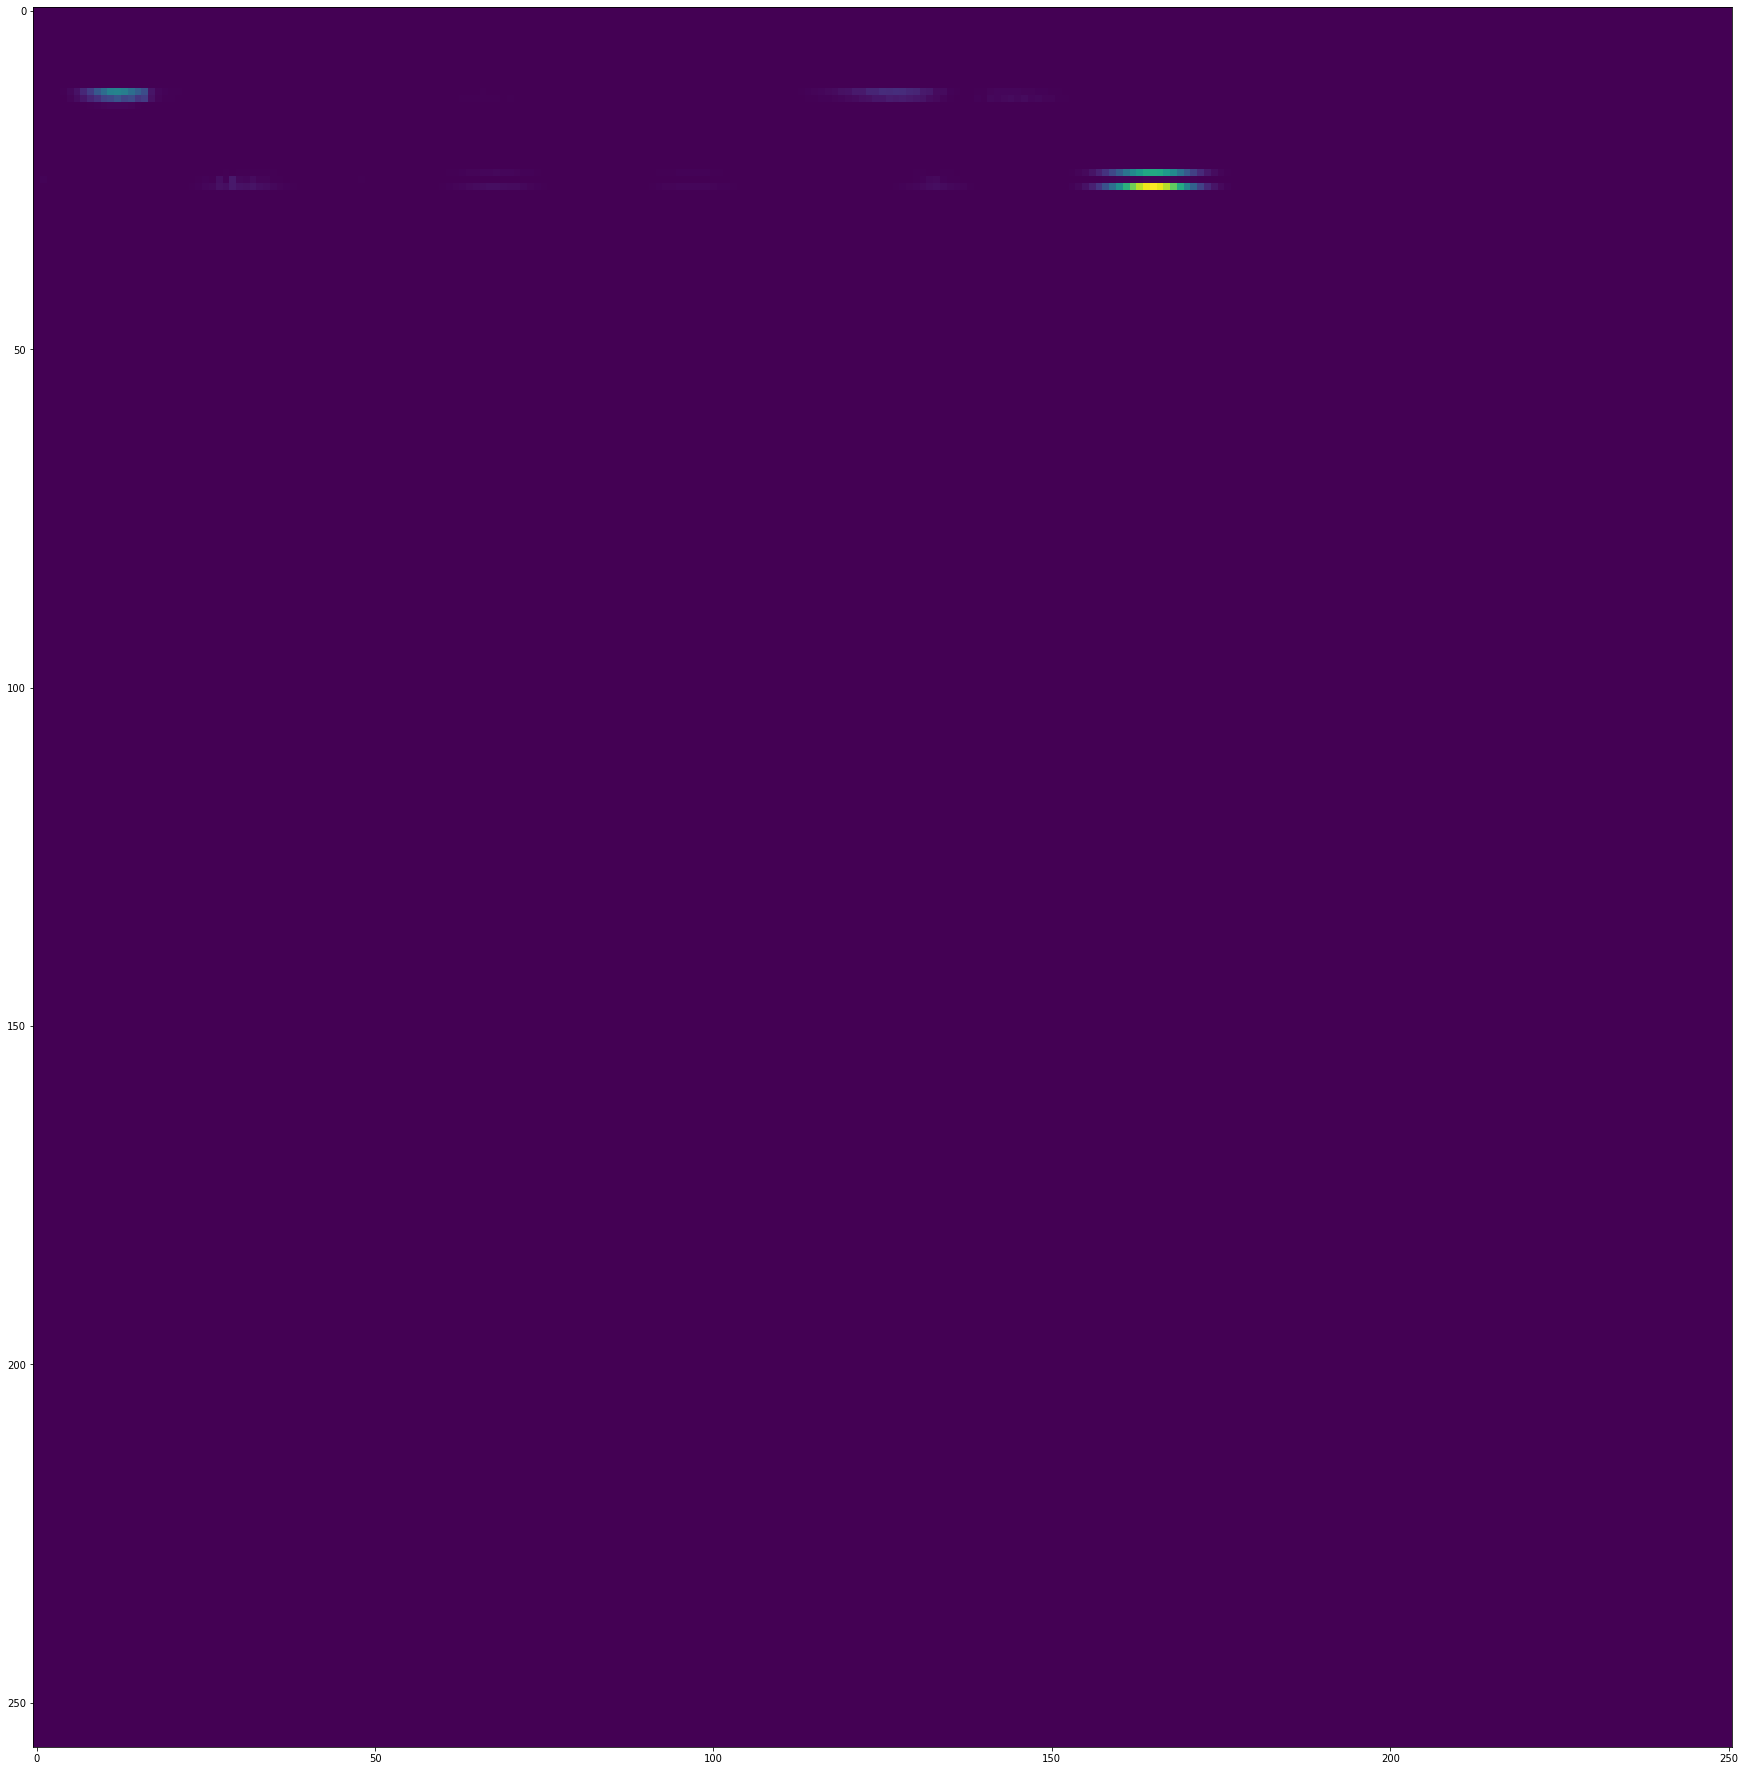

In [141]:
fdiff = (spectro - respectro)**2

print(fdiff.max())
plt.imshow(fdiff.squeeze(0).cpu().numpy())

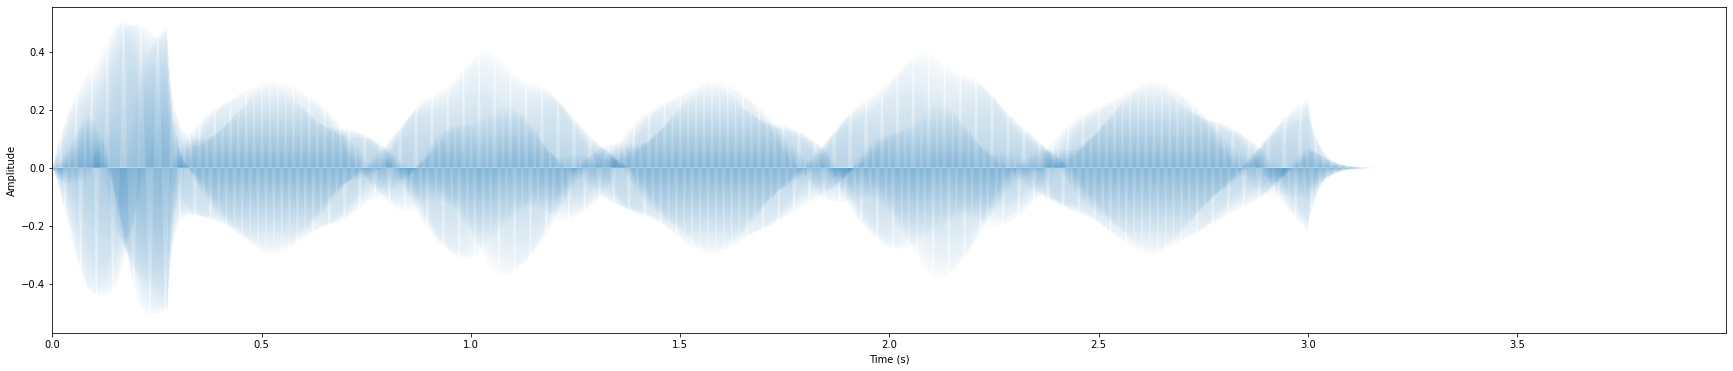

In [142]:
plot_sound(audio.cpu(), rate)

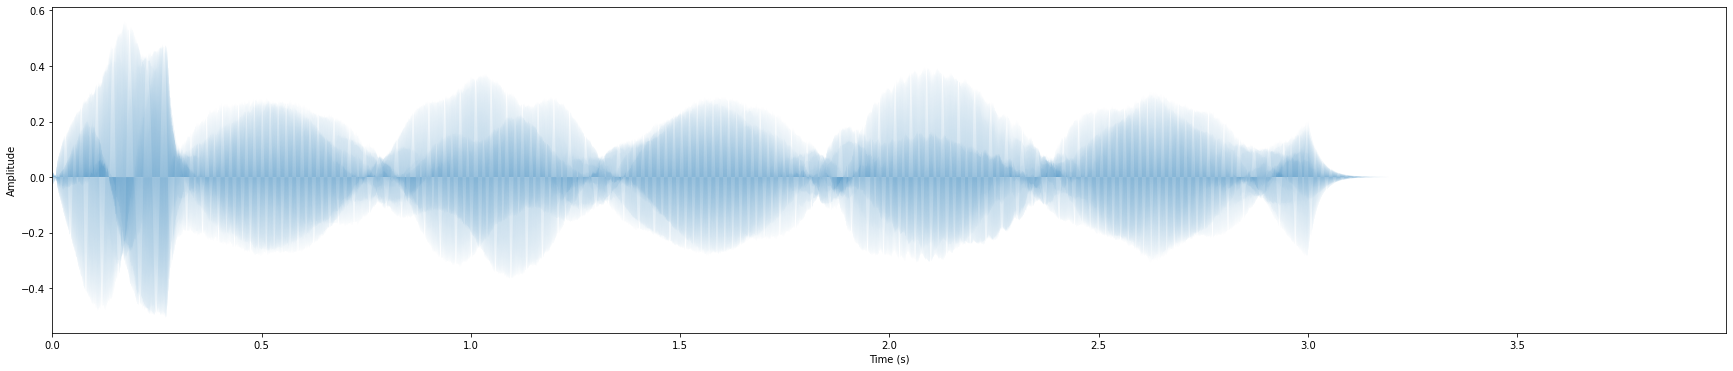

In [143]:
plot_sound(reconstruction.cpu(), rate)

In [144]:
IPython.display.Audio(audio, rate=rate)

In [145]:
IPython.display.Audio(reconstruction, rate=rate)